# 回归分析

In [118]:
import pandas as pd
import numpy as np
# 线性回归
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font='simhei')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [51]:
path = r'D:\Zhejiang University\Graduate Project\Data\Data\Cleaned\trip_questionaire.csv'
person_path = r'D:\Zhejiang University\Graduate Project\Data\Data\person.csv'
data = pd.read_csv(path)
person = pd.read_csv(person_path)
data.head()

,Unnamed: 0,用户ID,星期,日期,Trip_ID,出行目的,第几次出行,出发地点,到达地点,出发时间,...,性别,年龄,宿舍区,年级,专业大类,自行车保有,电动车保有,汽车保有,校内主要出行方式,校外主要出行方式
0,0,04D0BF86-23A4-498C-8DAD-1984B238772C,Thu,2018/04/17,04D0BF86-23A4-498C-8DAD-1984B238772C0001,4,1,翠柏二舍,安中大楼B,7:40,...,1,23,4,6,土木工程,2,2,2,1-2,1-2-7-8-9
1,1,04D0BF86-23A4-498C-8DAD-1984B238772C,Thu,2018/04/17,04D0BF86-23A4-498C-8DAD-1984B238772C0002,3,2,安中大楼B,风味食堂,11:15,...,1,23,4,6,土木工程,2,2,2,1-2,1-2-7-8-9
2,2,04D0BF86-23A4-498C-8DAD-1984B238772C,Thu,2018/04/17,04D0BF86-23A4-498C-8DAD-1984B238772C0003,6,3,风味食堂,翠柏二舍,11:40,...,1,23,4,6,土木工程,2,2,2,1-2,1-2-7-8-9
3,3,04D0BF86-23A4-498C-8DAD-1984B238772C,Thu,2018/04/17,04D0BF86-23A4-498C-8DAD-1984B238772C0004,4,4,翠柏二舍,安中大楼B,14:15,...,1,23,4,6,土木工程,2,2,2,1-2,1-2-7-8-9
4,4,04D0BF86-23A4-498C-8DAD-1984B238772C,Thu,2018/04/17,04D0BF86-23A4-498C-8DAD-1984B238772C0005,2,5,安中大楼B,西2,14:37,...,1,23,4,6,土木工程,2,2,2,1-2,1-2-7-8-9


C:\Users\yuhao\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


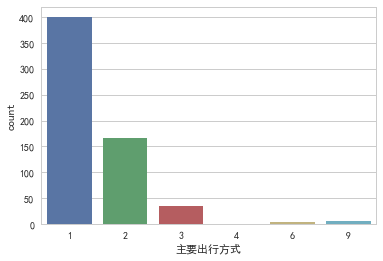

In [52]:
sns.countplot(x='主要出行方式', data=data)

## 预测主要出行方式
- 主要出行方式为1,2,3,4,6,9
- 选取特征：出行目的，出发时间，性别，年龄，宿舍取，年级，专业，自行车保有，电动车保有，汽车保有，校内主要出行方式，校外主要出行方式
- 专业大类需要转化成数字
- 出发时间需要按时间段划分
- 校内主要出行方式和校外主要出行方式使用向量表示

### 1.出发时间
按照上课时间划分:6:30前,6:30-8:00,8:00-9:35,9:35-9:50,9:50-11:25,11:25-13:15,13:15-14:05,14:05-15:40,15:40-15:55,15:55-17:30,17:30-18:30,18:30-20:05,20:05-20:55,20:55-22:30,22:30-23:30,23:30-次日6:30

In [53]:
time_list = ['6:31-8:00', '8:01-9:35', '9:36-9:50', '9:51-11:25', '11:26-13:15', '13:16-14:05', '14:06-15:40', '15:41-15:55', 
             '15:51-17:30', '17:31-18:30', '18:31-20:05', '20:06-20:55', '20:56-22:30', '22:31-23:30', '23:31-24:00', '0:01-6:30']

def calculate_time(time_list):
    discrete = list()
    for time in time_list:
        start, end = time.split('-')
        start_hour, start_minute = start.split(':')
        end_hour, end_minute = end.split(':')
        start_minutes = int(start_hour) * 60 + int(start_minute)
        end_minutes = int(end_hour) * 60 + int(end_minute)
        discrete.append((start_minutes, end_minutes))
    return discrete
discrete = calculate_time(time_list)

def discrete_time(time):
    """
    把时间按划分好间隔分配
    """
    time_list = ['6:31-8:00', '8:01-9:35', '9:36-9:50', '9:51-11:25', '11:26-13:15', '13:16-14:05', '14:06-15:40', '15:41-15:55', 
             '15:51-17:30', '17:31-18:30', '18:31-20:05', '20:06-20:55', '20:56-22:30', '22:31-23:30', '23:31-24:00', '0:01-6:30']
    discrete = calculate_time(time_list)
    hour, minute = time.split(':')
    hour = int(hour)
    minute = int(minute)
    if hour == 24 and minute > 0:
        hour -= 24
    minutes = hour * 60 + minute
    for i in range(len(discrete)):
        if minutes >= discrete[i][0] and minutes <= discrete[i][1]:
            return i

In [54]:
data['time'] = data['出发时间'].apply(discrete_time)
data['time'].astype('int')

0       0
1       3
2       4
3       6
4       6
5       8
6      12
7       0
8       3
9       4
10      5
11      8
12      8
13     10
14     11
15     12
16      1
17      1
18      1
19      1
20      4
21      4
22      8
23      8
24      9
25     10
26      0
27      1
28      3
29      8
       ..
584     1
585     1
586     4
587     4
588     7
589     7
590     9
591     0
592     0
593     4
594     5
595     8
596    10
597    10
598     0
599     3
600     5
601     7
602    12
603     0
604     1
605     3
606     4
607    12
608     0
609     3
610     4
611     5
612     7
613    12
Name: time, Length: 614, dtype: int32

### 2.专业大类
将专业大类转化编号

C:\Users\yuhao\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


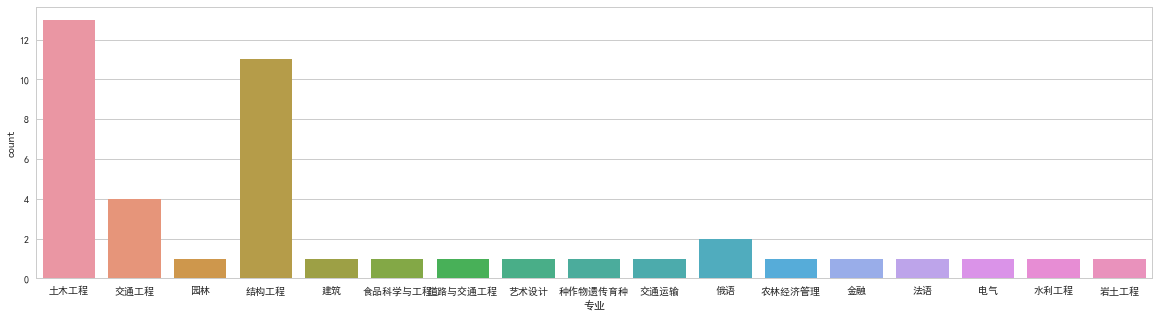

In [55]:
ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='专业', data=person)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 40 columns):
Unnamed: 0    614 non-null int64
用户ID          614 non-null object
星期            614 non-null object
日期            614 non-null object
Trip_ID       614 non-null object
出行目的          614 non-null int64
第几次出行         614 non-null int64
出发地点          614 non-null object
到达地点          614 non-null object
出发时间          614 non-null object
达到时间          614 non-null object
出发时           614 non-null int64
出发分           614 non-null int64
到达时           614 non-null int64
到达分           614 non-null int64
出行时间          614 non-null int64
出行方式总数        614 non-null int64
主要出行方式        614 non-null int64
出行方式1         614 non-null int64
用时1           614 non-null int64
出行方式2         614 non-null object
用时2           614 non-null object
出行方式3         614 non-null object
用时3           614 non-null object
出行方式4         614 non-null object
用时4           614 non-null object
路线            614 non-n

C:\Users\yuhao\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
C:\Users\yuhao\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


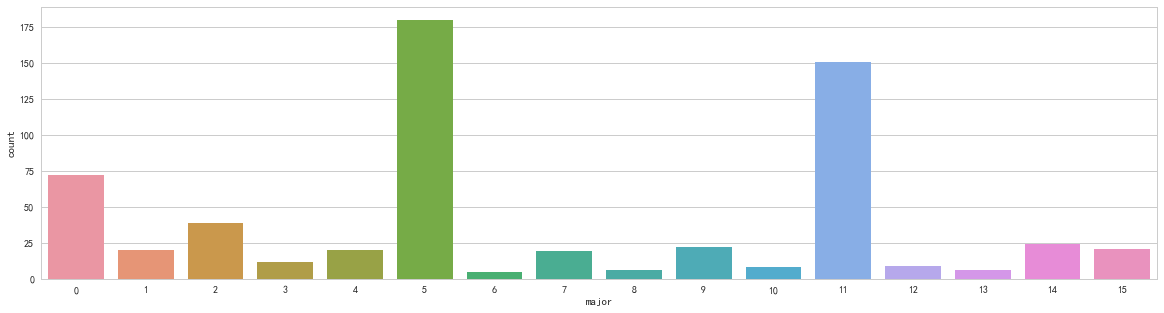

In [56]:
# 初始化
le = preprocessing.LabelEncoder()
le.fit(data['专业大类'])
data['major'] = le.transform(data['专业大类'])
ax = plt.subplots(figsize=(20, 5))
print(data.info())
sns.countplot(x='major', data=data)
print(le.inverse_transform(range(12)))

### 3.主要出行方式
- 校内主要出行方式6种，其中3可以表示为[0,0,1,0,0,0,0]
- 校外主要出行方式10种，其中3-8-9可表示为[0,0,1,0,0,0,0,1,1,0]

Text(0.5,0,'校外主要出行方式')

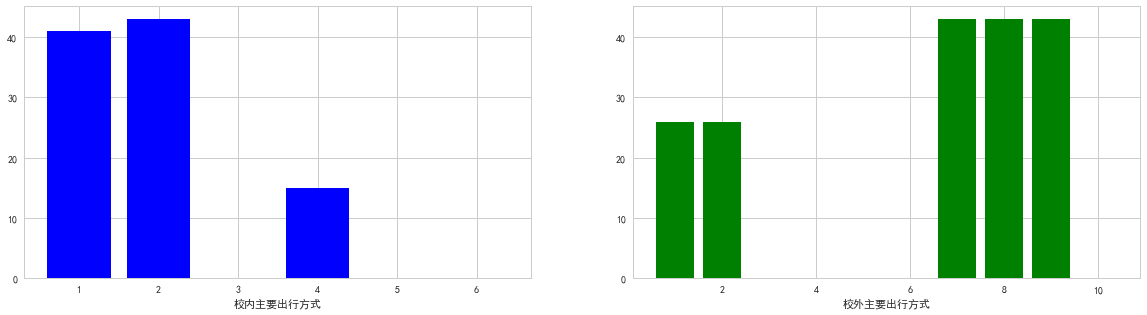

In [77]:
main_mode_in_college = np.zeros(7)
main_mode_out_college = np.zeros(11)
main_in_college = np.zeros((data.shape[0], 7))
main_out_college = np.zeros((data.shape[0], 11))
lines = person.shape[0]
for i in range(lines):
    in_college, out_college = data.loc[i, ['校内主要出行方式', '校外主要出行方式']]
    in_colleges = in_college.split('-')
    out_colleges = out_college.split('-')
    for mode in in_colleges:
        main_mode_in_college[int(mode)] += 1
        main_in_college[i, int(mode)] = 1
    for mode in out_colleges:
        main_mode_out_college[int(mode)] += 1
        main_out_college[i, int(mode)] = 1
    
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(20, 5))
axis1.bar(list(range(7))[1:], main_mode_in_college[1:], color='b')
axis1.set_xlabel('校内主要出行方式')
axis2.bar(list(range(11))[1:], main_mode_out_college[1:], color='g')
axis2.set_xlabel('校外主要出行方式')

In [84]:
for i in range(6):
    name = 'in' + str(i+1)
    data[name] = main_in_college[:, i+1]
for j in range(10):
    name = 'out' + str(j+1)
    data[name] = main_out_college[:, j+1]
data.head()

,Unnamed: 0,用户ID,星期,日期,Trip_ID,出行目的,第几次出行,出发地点,到达地点,出发时间,...,out1,out2,out3,out4,out5,out6,out7,out8,out9,out10
0,0,04D0BF86-23A4-498C-8DAD-1984B238772C,Thu,2018/04/17,04D0BF86-23A4-498C-8DAD-1984B238772C0001,4,1,翠柏二舍,安中大楼B,7:40,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,1,04D0BF86-23A4-498C-8DAD-1984B238772C,Thu,2018/04/17,04D0BF86-23A4-498C-8DAD-1984B238772C0002,3,2,安中大楼B,风味食堂,11:15,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,2,04D0BF86-23A4-498C-8DAD-1984B238772C,Thu,2018/04/17,04D0BF86-23A4-498C-8DAD-1984B238772C0003,6,3,风味食堂,翠柏二舍,11:40,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,3,04D0BF86-23A4-498C-8DAD-1984B238772C,Thu,2018/04/17,04D0BF86-23A4-498C-8DAD-1984B238772C0004,4,4,翠柏二舍,安中大楼B,14:15,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,4,04D0BF86-23A4-498C-8DAD-1984B238772C,Thu,2018/04/17,04D0BF86-23A4-498C-8DAD-1984B238772C0005,2,5,安中大楼B,西2,14:37,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


### 4.处理年龄
- 使年龄从1开始

C:\Users\yuhao\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


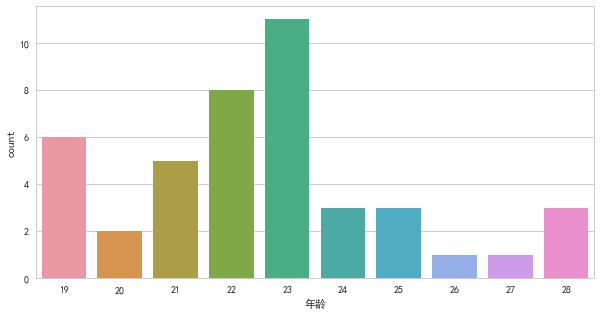

In [64]:
ax = plt.subplots(figsize=(10 ,5))
sns.countplot(x='年龄', data=person)

In [65]:
def get_age(age):
    new_age = int(age) - 18
    return new_age
data['age'] = data['年龄'].apply(get_age)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 41 columns):
Unnamed: 0    614 non-null int64
用户ID          614 non-null object
星期            614 non-null object
日期            614 non-null object
Trip_ID       614 non-null object
出行目的          614 non-null int64
第几次出行         614 non-null int64
出发地点          614 non-null object
到达地点          614 non-null object
出发时间          614 non-null object
达到时间          614 non-null object
出发时           614 non-null int64
出发分           614 non-null int64
到达时           614 non-null int64
到达分           614 non-null int64
出行时间          614 non-null int64
出行方式总数        614 non-null int64
主要出行方式        614 non-null int64
出行方式1         614 non-null int64
用时1           614 non-null int64
出行方式2         614 non-null object
用时2           614 non-null object
出行方式3         614 non-null object
用时3           614 non-null object
出行方式4         614 non-null object
用时4           614 non-null object
路线            614 non-n

## 生成训练数据
- 整合特征变量

In [85]:
train_data = data.loc[:, ['出行目的', 'time', '性别', 'age', '宿舍区', '年级', 'major', '自行车保有', '电动车保有', '汽车保有',
                          'in1', 'in2', 'in3', 'in4', 'in5', 'in6',
                          'out1', 'out2', 'out3', 'out4', 'out5', 'out6', 'out7', 'out8', 'out9', 'out10',
                          '主要出行方式']]
train_data.head()

,出行目的,time,性别,age,宿舍区,年级,major,自行车保有,电动车保有,汽车保有,...,out2,out3,out4,out5,out6,out7,out8,out9,out10,主要出行方式
0,4,0,1,5,4,6,5,2,2,2,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1
1,3,3,1,5,4,6,5,2,2,2,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1
2,6,4,1,5,4,6,5,2,2,2,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1
3,4,6,1,5,4,6,5,2,2,2,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1
4,2,6,1,5,4,6,5,2,2,2,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1


In [92]:
# 特征还要加上校内外主要出行方式的向量表示方法
y = np.array(train_data['主要出行方式'])
y.astype('int')

x = np.array(train_data.loc[:, ['出行目的', 'time', '性别', 'age', '宿舍区', '年级', 'major', '自行车保有', '电动车保有', '汽车保有',
                          'in1', 'in2', 'in3', 'in4', 'in5', 'in6',
                          'out1', 'out2', 'out3', 'out4', 'out5', 'out6', 'out7', 'out8', 'out9', 'out10',]])
x.astype('int')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [96]:
print(y_train.shape)
print('###############################################')
print(x_train.shape)

(460,)
###############################################
(460, 26)


### 逻辑回归

In [131]:
lr = LogisticRegression(C=1.0, penalty='l1', tol=0.0001, solver='liblinear')
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
lr.fit(x_train_std, y_train)
score_of_lr = lr.score(x_test_std, y_test)
result = lr.predict(x_test_std)
prob = lr.predict_proba(x_test_std)
print(score_of_lr)
print(lr.coef_)

0.6883116883116883
[[-2.89644615e-02  1.05237995e-01  1.45720268e-01 -1.03237615e+00
   4.55350822e-01  1.40568951e+00 -3.04189665e-02  2.66407792e-01
  -9.54460173e-02  0.00000000e+00  0.00000000e+00 -1.24043687e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   2.62013958e-01  1.29543353e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.39217889e-01 -1.14342878e-01
  -3.49210734e-05  0.00000000e+00]
 [ 1.08612362e-02 -3.08914904e-02 -2.77057418e-01  5.51146544e-01
  -2.75329294e-01 -1.16369622e+00  1.87088571e-01 -3.68788592e-01
   1.06441962e+00  0.00000000e+00  0.00000000e+00  6.26252090e-02
   0.00000000e+00  2.71545418e-01  0.00000000e+00  0.00000000e+00
  -6.24059420e-02 -6.83931465e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.84959817e-06  1.98336702e-07
   1.04226952e-02  0.00000000e+00]
 [ 0.00000000e+00 -2.67792667e-01  6.30369155e-01  8.79119049e-02
  -9.47424194e-01  1.01896362e+00 -4.63639237e-01 -6.

In [126]:
lr.sparsify()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 支持向量机

In [135]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(random_state=0)
lsvc.fit(x_train_std, y_train)
score_of_svc = lsvc.score(x_test_std, y_test)
print(score_of_svc)
print(lsvc.coef_)

0.6883116883116883
[[-0.01575023  0.0501      0.08282678 -0.44572219  0.18076417  0.6143426
  -0.03562336  0.10813194 -0.05157502  0.          0.06018393 -0.06382331
   0.          0.00457414  0.          0.          0.07366926  0.07366926
   0.          0.          0.          0.         -0.06382331 -0.06382331
  -0.06382331  0.        ]
 [ 0.01059499 -0.02138551 -0.13035955  0.3103577  -0.11437095 -0.54098495
   0.06959868 -0.1247619   0.32375814  0.          0.03007639  0.01757265
   0.          0.08595338  0.          0.         -0.03387477 -0.03387477
   0.          0.          0.          0.          0.01757265  0.01757265
   0.01757265  0.        ]
 [-0.0033324  -0.08305871  0.3257316  -0.08329902 -0.46362674  0.69933469
  -0.31931343 -0.36268921 -0.57667019  0.         -0.01909924 -0.00936266
   0.         -0.09981263  0.          0.          0.05972607  0.05972607
   0.          0.          0.          0.         -0.00936266 -0.00936266
  -0.00936266  0.        ]
 [-0.01562338

### 随机森林

0.7272727272727273


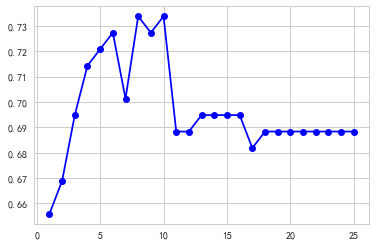

In [152]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, random_state=0)
rfc.fit(x_train_std, y_train)
score_of_rfc = rfc.score(x_test_std, y_test)
print(score_of_rfc)
scores = [0]
for i in range(1, 26):
    rfc = RandomForestClassifier(max_depth=i, random_state=0)
    rfc.fit(x_train_std, y_train)
    scores.append(rfc.score(x_test_std, y_test))
plt.plot(list(range(26))[1:], scores[1:], 'bo-')

当max_depth深度为8是，正确率最高

In [153]:
rfc = RandomForestClassifier(max_depth=8, random_state=0)
rfc.fit(x_train_std, y_train)
score_of_rfc = rfc.score(x_test_std, y_test)
print(score_of_rfc)
print(rfc.feature_importances_)

0.7337662337662337
[0.13165727 0.18295385 0.04160035 0.20655677 0.14726657 0.03935866
 0.08914537 0.05939801 0.06726423 0.         0.00224129 0.00315125
 0.         0.01058301 0.         0.         0.00280652 0.00789778
 0.         0.         0.         0.         0.00116759 0.00259816
 0.00435331 0.        ]
